In [170]:
{-# LANGUAGE NoMonomorphismRestriction #-}
{-# LANGUAGE FlexibleContexts          #-}
{-# LANGUAGE TypeFamilies              #-}
import Data.Active
import Diagrams.Prelude
import Diagrams.Backend.Cairo
import IHaskell.Display
import Diagrams.Animation
import Linear.Vector
import Data.Tuple

let n = 50
let wdth = 1000.0
let hight = 1000.0
let std = map (/n) [0..n]
let pt = circle 1 # fc red
let speed = stretch 0.75 ui
rad = 100
draw points = atPoints (map p2 points) $ repeat pt

In [171]:
lerpScaler x a b c d = fst $ unr2 $ lerp ((x - a)/(b - a)) (r2 (d,0)) (r2 (c,0))
-- lerpPts x pts1 pts2 = map unr2 $ zipWith (lerp x) (map r2 pts1) (map r2 pts2) 
lerpPts x pts1 pts2 = map unr2 $ zipWith (lerp x) (map r2 pts2) (map r2 pts1)

rotate' ang (x,y) = ((cos ang)*x - (sin ang)*y, (sin ang)*x + (cos ang)*y)
rotatePts ang points = map (rotate' ang) points

foo small' big' = ((lerpScaler (abs small') (-c') c' (-sideL) sideL)*signum small', sideL*signum big')
                where   c' = 100*(cos (pi/4.0))
                        sideL = 100
squarify (x,y) =  if abs x < abs y then foo x y else swap $ foo y x

mkScene shotx shoty = (pure (\t -> (draw (lerpPts (t) shotx shoty))) <*> speed) :: Animation B V2 Double
play shots = movie $ zipWith mkScene (init shots) (tail shots)

In [172]:
-- sc1 = rnds
shot2 = zip std (repeat 0.0)
shot3 = map (\x -> (rad*cos(2*pi*x), rad*sin(2*pi*x))) std
shot4 = rotatePts (pi / 4) $ map squarify shot3
shot5 = lerpPts 1.6 shot3 shot4


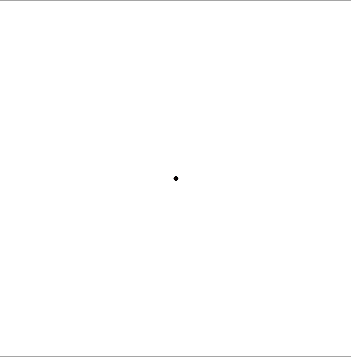

In [173]:
play [shot2, shot3, shot4, shot5]